# Ajuste linear

Ajuste da reta $y = a_1 + a_2 x$.


In [3]:
# definindo a reta de referência:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def reta(x, a_1= -4.0, a_2 = 3.0):
    return a_2 * x + a_1

In [5]:
x = np.asarray([-2, 0, 2, 4, 6, 8, 10, 12, 14, 16])
y = reta(x,-4, 3.0)
N = len(x) # número de pontos medidos
sigma = 2 * (np.random.random(N) - 0.5)
y_exp = y + sigma
sigma = np.ones(N)
print(sigma)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
arq = "reta.dat"
z_data=np.zeros([N,2])

for i in range(N):
    z_data[i,:] = x[i], y_exp[i]

np.savetxt(arq,z_data)
z_data

array([[-2.        , -9.94422713],
       [ 0.        , -3.26276817],
       [ 2.        ,  1.76272676],
       [ 4.        ,  8.24322939],
       [ 6.        , 13.50654273],
       [ 8.        , 19.66497029],
       [10.        , 26.48860374],
       [12.        , 32.50848549],
       [14.        , 38.53404297],
       [16.        , 44.03022812]])

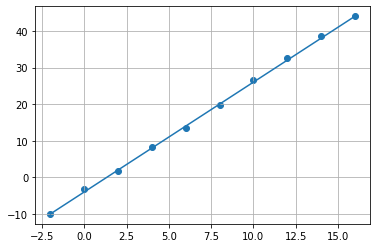

In [7]:
plt.plot(x,y)
plt.scatter(x,y_exp)
plt.grid()
plt.show()

In [8]:
# Definindo a matriz de curvaturas (Hessiana) do problema:

A =np.zeros([2,2])
C =np.zeros([2,2])

In [9]:
for i in range(N):
    A[1,1]= A[1,1] + (x[i]/sigma[i])**2 
    A[0,1]= A[0,1] + x[i]/(sigma[i])**2
    A[1,0]= A[1,0] + x[i]/(sigma[i])**2
    A[0,0]= A[0,0] + (1.0/sigma[i])**2

In [10]:
# Definindo a Matriz de correlação - i.e. inversa da Matriz de curvatura.

det_A = A[0,0]*A[1,1] - A[1,0] * A[0,1]

In [11]:
C[0,0] = A[1,1]/det_A
C[1,1] = A[0,0]/det_A
C[1,0] = -A[1,0]/det_A
C[0,1] = -A[0,1]/det_A

In [12]:
D= np.matmul(A,C) #Verificando se, de fato, são inversas / Matrix product of two arrays.
D

array([[ 1.00000000e+00, -6.07153217e-18],
       [-5.13478149e-16,  1.00000000e+00]])

In [13]:
# Definindo a matriz de medições:
D=np.zeros([2])

In [14]:
for i in range(N):
    D[0] = D[0] + y_exp[i]/(sigma[i]**2)
    D[1] = D[1] + x[i] * y_exp[i]/(sigma[i]**2)

In [15]:
#Determinando os coeficientes:
a = np.matmul(C,D)

In [16]:
a_1 = a[0]
a_2 = a[1]
sig_a1 = np.sqrt(C[0,0])
sig_a2 = np.sqrt(C[1,1])

In [17]:
print(a_1, sig_a1)
print(a_2, sig_a2)

-3.9098403278276024 0.49848254581765294
3.009003392444673 0.05504818825631803


In [18]:
# Comparando com os resultados da rotina polyfit:

In [19]:
z = np.polyfit(x,y_exp, deg=1, cov=True)

In [20]:
err_a1 = np.sqrt(z[1][0,0])
err_a2 = np.sqrt(z[1][1,1])

In [21]:
print(z[0][1], err_a2)
print(z[0][0], err_a1)

-3.9098403278276015 0.21869629226779327
3.009003392444675 0.024150965302043078


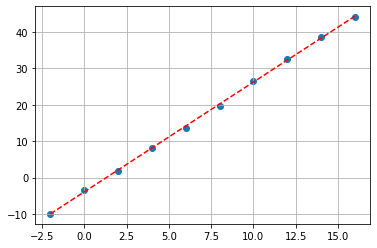

In [22]:
plt.scatter(x,y_exp)
plt.plot(x, reta(x, a_1, a_2), c='r', ls='--')
plt.grid()
plt.show()

In [23]:
# Utilizando o coeficiente de correlação linear para encontrar os parâmetros de ajuste:

x_med = np.mean(x)
y_med = np.mean(y_exp)

S_x = np.sqrt(np.sum((x - x_med)**2)/(N-1))
S_y = np.sqrt(np.sum((y_exp - y_med)**2)/(N-1))

In [24]:
r = np.sum((((x - x_med)/S_x) *  ((y - y_med)/S_y)))/(N-1)

In [25]:
print(r)

0.9967510375752148


In [26]:
a = r * S_y/S_x
b = y_med - a * x_med

In [27]:
print(a,b)

3.0 -3.8468165807148864


## Conclusão: 
O ajuste pelo "método estatístico" e  ajuste via mínimos quadrados produzem resultados coerentes.